**Overview**

*Data Preprocessing*:
- dropped unimportant columns
- standardized features to prepare for modeling
- performed PCA
- general exploration and visualization performed

*Logistic Regression*
- target variable: Dropout is encoded and logistic regression is applied
- Data is split into training and testing sets with an 80-20 ratio.
- After fitting the logistic regression model, predictions are made on the test data

*Performance Evaluation*
- defines a function performLR_printResults to compute and print metrics such as precision, recall, F1-score, and accuracy.
- generates a confusion matrix and a classification report to evaluate the model's performance visually and statistically.

In [115]:
# importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay


In [ ]:
x = df.iloc[:, :34].values
x = StandardScaler().fit_transform(x)
y = df['Dropout'].values

In [ ]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [116]:
def performLR_printResults(y_true, y_pred):
    # Calculate evaluation metrics
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='micro')
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    # Print evaluation metrics
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1_score))
    print("Accuracy: {:.4f}".format(accuracy))
    print("\nConfusion Matrix:\n", cm)

    # Print classification report
    report = classification_report(y_true, y_pred, target_names=['Non-Dropout', 'Dropout'])
    print("\n" +  "\n" + " "  + "Classification Report\n" )
    print(report)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Dropout', 'Dropout'])
    disp.plot()

In [ ]:
model_lr_nopca = LogisticRegression()
model_lr_nopca.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr_noPCA = model_lr_nopca.predict(x_test)

Precision :  0.8790960451977401
Recall :  0.8790960451977401
Accuracy :  0.8790960451977401
F1 Score :  0.8790960451977401

 [[580  31]
 [ 76 198]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       611
           1       0.86      0.72      0.79       274

    accuracy                           0.88       885
   macro avg       0.87      0.84      0.85       885
weighted avg       0.88      0.88      0.88       885

******************************************************



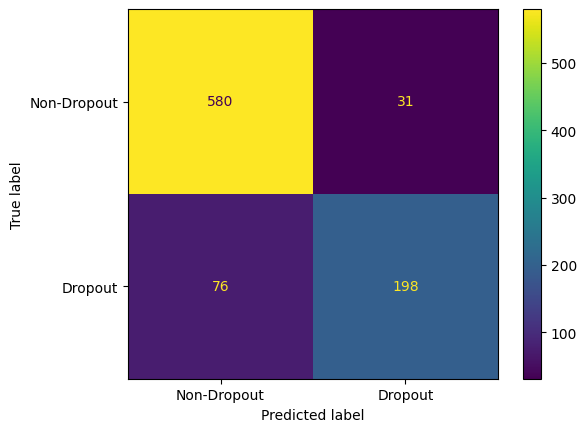

In [ ]:
performLR_printResults(y_test, y_pred_lr_noPCA)

In [ ]:
df_1 =  pd.read_csv('dropout_data.csv')

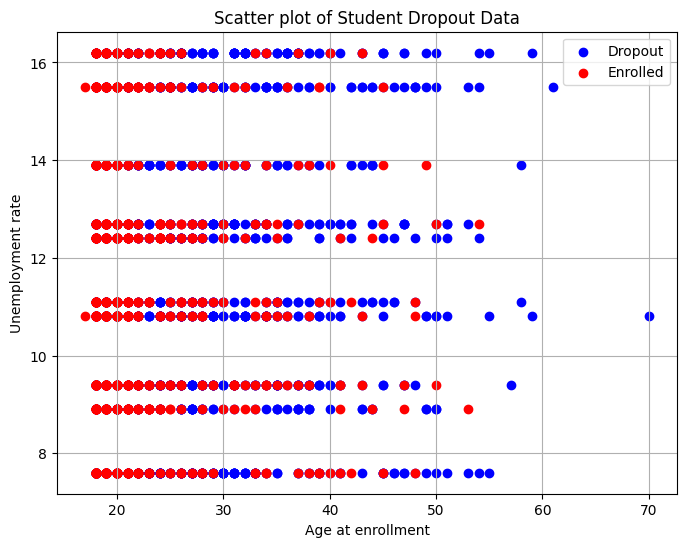

In [ ]:
# Define the features for plotting
X = df_1[['Age at enrollment', 'Unemployment rate']].values
y = df_1['Target']

# Encode the 'Target' with integers for plotting
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define class names based on the unique values in 'Target'
class_names = le.classes_

# Create scatter plot
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']  # Colors for Dropout and Graduate

for i, color in enumerate(colors):
    plt.scatter(X[y_encoded == i, 0], X[y_encoded == i, 1], color=color, label=class_names[i])

plt.xlabel('Age at enrollment')
plt.ylabel('Unemployment rate')
plt.title('Scatter plot of Student Dropout Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
education_df = renumber_education_levels(df_1, "Mother's qualification")
education_df = renumber_education_levels(education_df, "Father's qualification")
education_df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,20.0,7.0,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,25.0,27.0,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,8.0,3.0,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23.0,3.0,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,8.0,26.0,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [ ]:
ed_df_untransformed =  pd.read_csv('dropout_data.csv')
ed_df_untransformed = renumber_education_levels(ed_df_untransformed, "Mother's qualification")
ed_df_untransformed = renumber_education_levels(ed_df_untransformed, "Father's qualification")
ed_df_untransformed.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,14,11,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,25,27,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,15,3,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,16,3,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,15,4,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


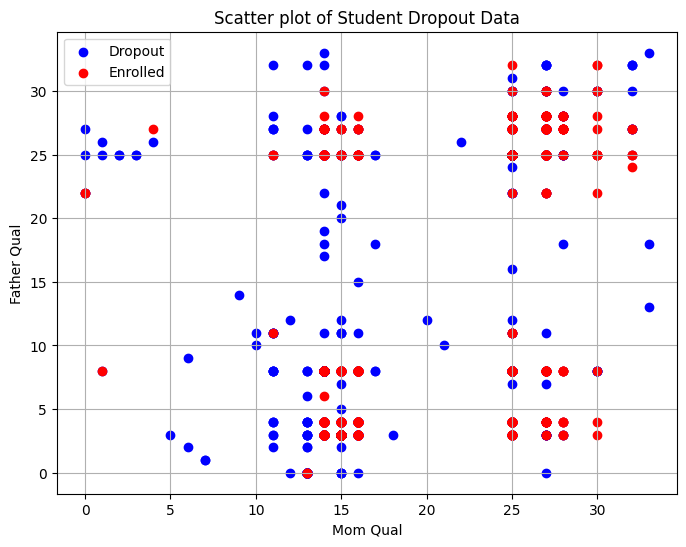

In [ ]:
# Define the features for plotting
X_ed = ed_df_untransformed[["Mother's qualification", "Father's qualification"]].values
y_ed = ed_df_untransformed['Target']

# Encode the 'Target' with integers for plotting
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_ed)

# Define class names based on the unique values in 'Target'
class_names = le.classes_

# Create scatter plot
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']  # Colors for Dropout and Graduate

for i, color in enumerate(colors):
    plt.scatter(X_ed[y_encoded == i, 0], X_ed[y_encoded == i, 1], color=color, label=class_names[i])

plt.xlabel('Mom Qual')
plt.ylabel('Father Qual')
plt.title('Scatter plot of Student Dropout Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Running Logistic Regression with PCA

In [ ]:
# load data
data = pd.read_csv("dropout_data.csv")

In [ ]:
#dropping unimportant columns
data = data.dropna()
processed_data = data[~data["Target"].str.contains("Enroll")].copy()
processed_data.drop(['International',
           'Nacionality',
           "Mother's qualification",
           "Curricular units 1st sem (evaluations)",
           "Mother's occupation",
           "Father's occupation",
           "Father's qualification",
           'Unemployment rate',
           "Application order",
           "GDP",
           'Inflation rate'],axis=1,inplace=True)

processed_data.loc[:, 'Target_Binary'] = processed_data['Target'].apply(lambda x: 0 if x == "Dropout" else 1)
exploration_data = processed_data.drop(columns=["Target", "Target_Binary"])

In [ ]:
def renumber_education_levels(df, column):
    # Mapping from old numbering to new ordered numbering
    education_map = {
        25: 1,  # Cannot read or write
        26: 2,  # Can read without having a 4th year of schooling
        27: 3,  # Basic education 1st cycle (4th/5th year) or equivalent
        28: 4,  # Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent
        18: 5,  # 7th year of schooling
        21: 6,  # 8th year of schooling
        20: 7,  # 9th Year of Schooling—not completed
        14: 8,  # Basic Education 3rd Cycle (9th/10th/11th Year) or equivalent
        12: 9,  # 10th Year of Schooling
        8: 10,  # 11th Year of Schooling—not completed
        10: 11, # Other—11th Year of Schooling
        9: 12,  # 7th Year (Old)
        19: 13, # 2nd cycle of the general high school course
        13: 14, # General commerce course
        22: 15, # General Course of Administration and Commerce
        23: 16, # Supplementary Accounting and Administration
        7: 17,  # 12th Year of Schooling—not completed
        16: 18, # Technical-professional course
        15: 19, # Complementary High School Course
        11: 20, # 2nd year complementary high school course
        17: 21, # Complementary High School Course—not concluded
        29: 22, # Technological specialization course
        32: 23, # Professional higher technical course
        31: 24, # Specialized higher studies course
        1: 25,  # Secondary Education—12th Year of Schooling or Equivalent
        30: 26, # Higher Education—degree (1st cycle)
        3: 27,  # Higher Education—degree
        2: 28,  # Higher Education—bachelor’s degree
        33: 29, # Higher Education—master’s degree (2nd cycle)
        4: 30,  # Higher Education—master’s degree
        34: 31, # Higher Education—doctorate (3rd cycle)
        5: 32,  # Higher Education—doctorate
        6: 33, # Frequency of Higher Education
        24: 0   # Unknown (now renumbered to 0)
    }

    # Apply the mapping to the specified column
    df[column] = df[column].map(education_map)
    return df


In [ ]:
data = renumber_education_levels(data, "Mother's qualification")
data = renumber_education_levels(data, "Father's qualification")
data.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,14,11,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,25,27,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,15,3,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,16,3,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,15,4,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data.drop(data[data['Target'] == 'enrolled'].index, inplace=True)

In [ ]:
data['Target'] = data['Target'].replace(['Dropout', 'Graduate', 'Enrolled'], [-1, 1, 0])

In [ ]:
data_mod = pd.read_csv("dropout_data.csv")
data_mod.drop(data_mod[data_mod['Target'] == 'enrolled'].index, inplace=True)

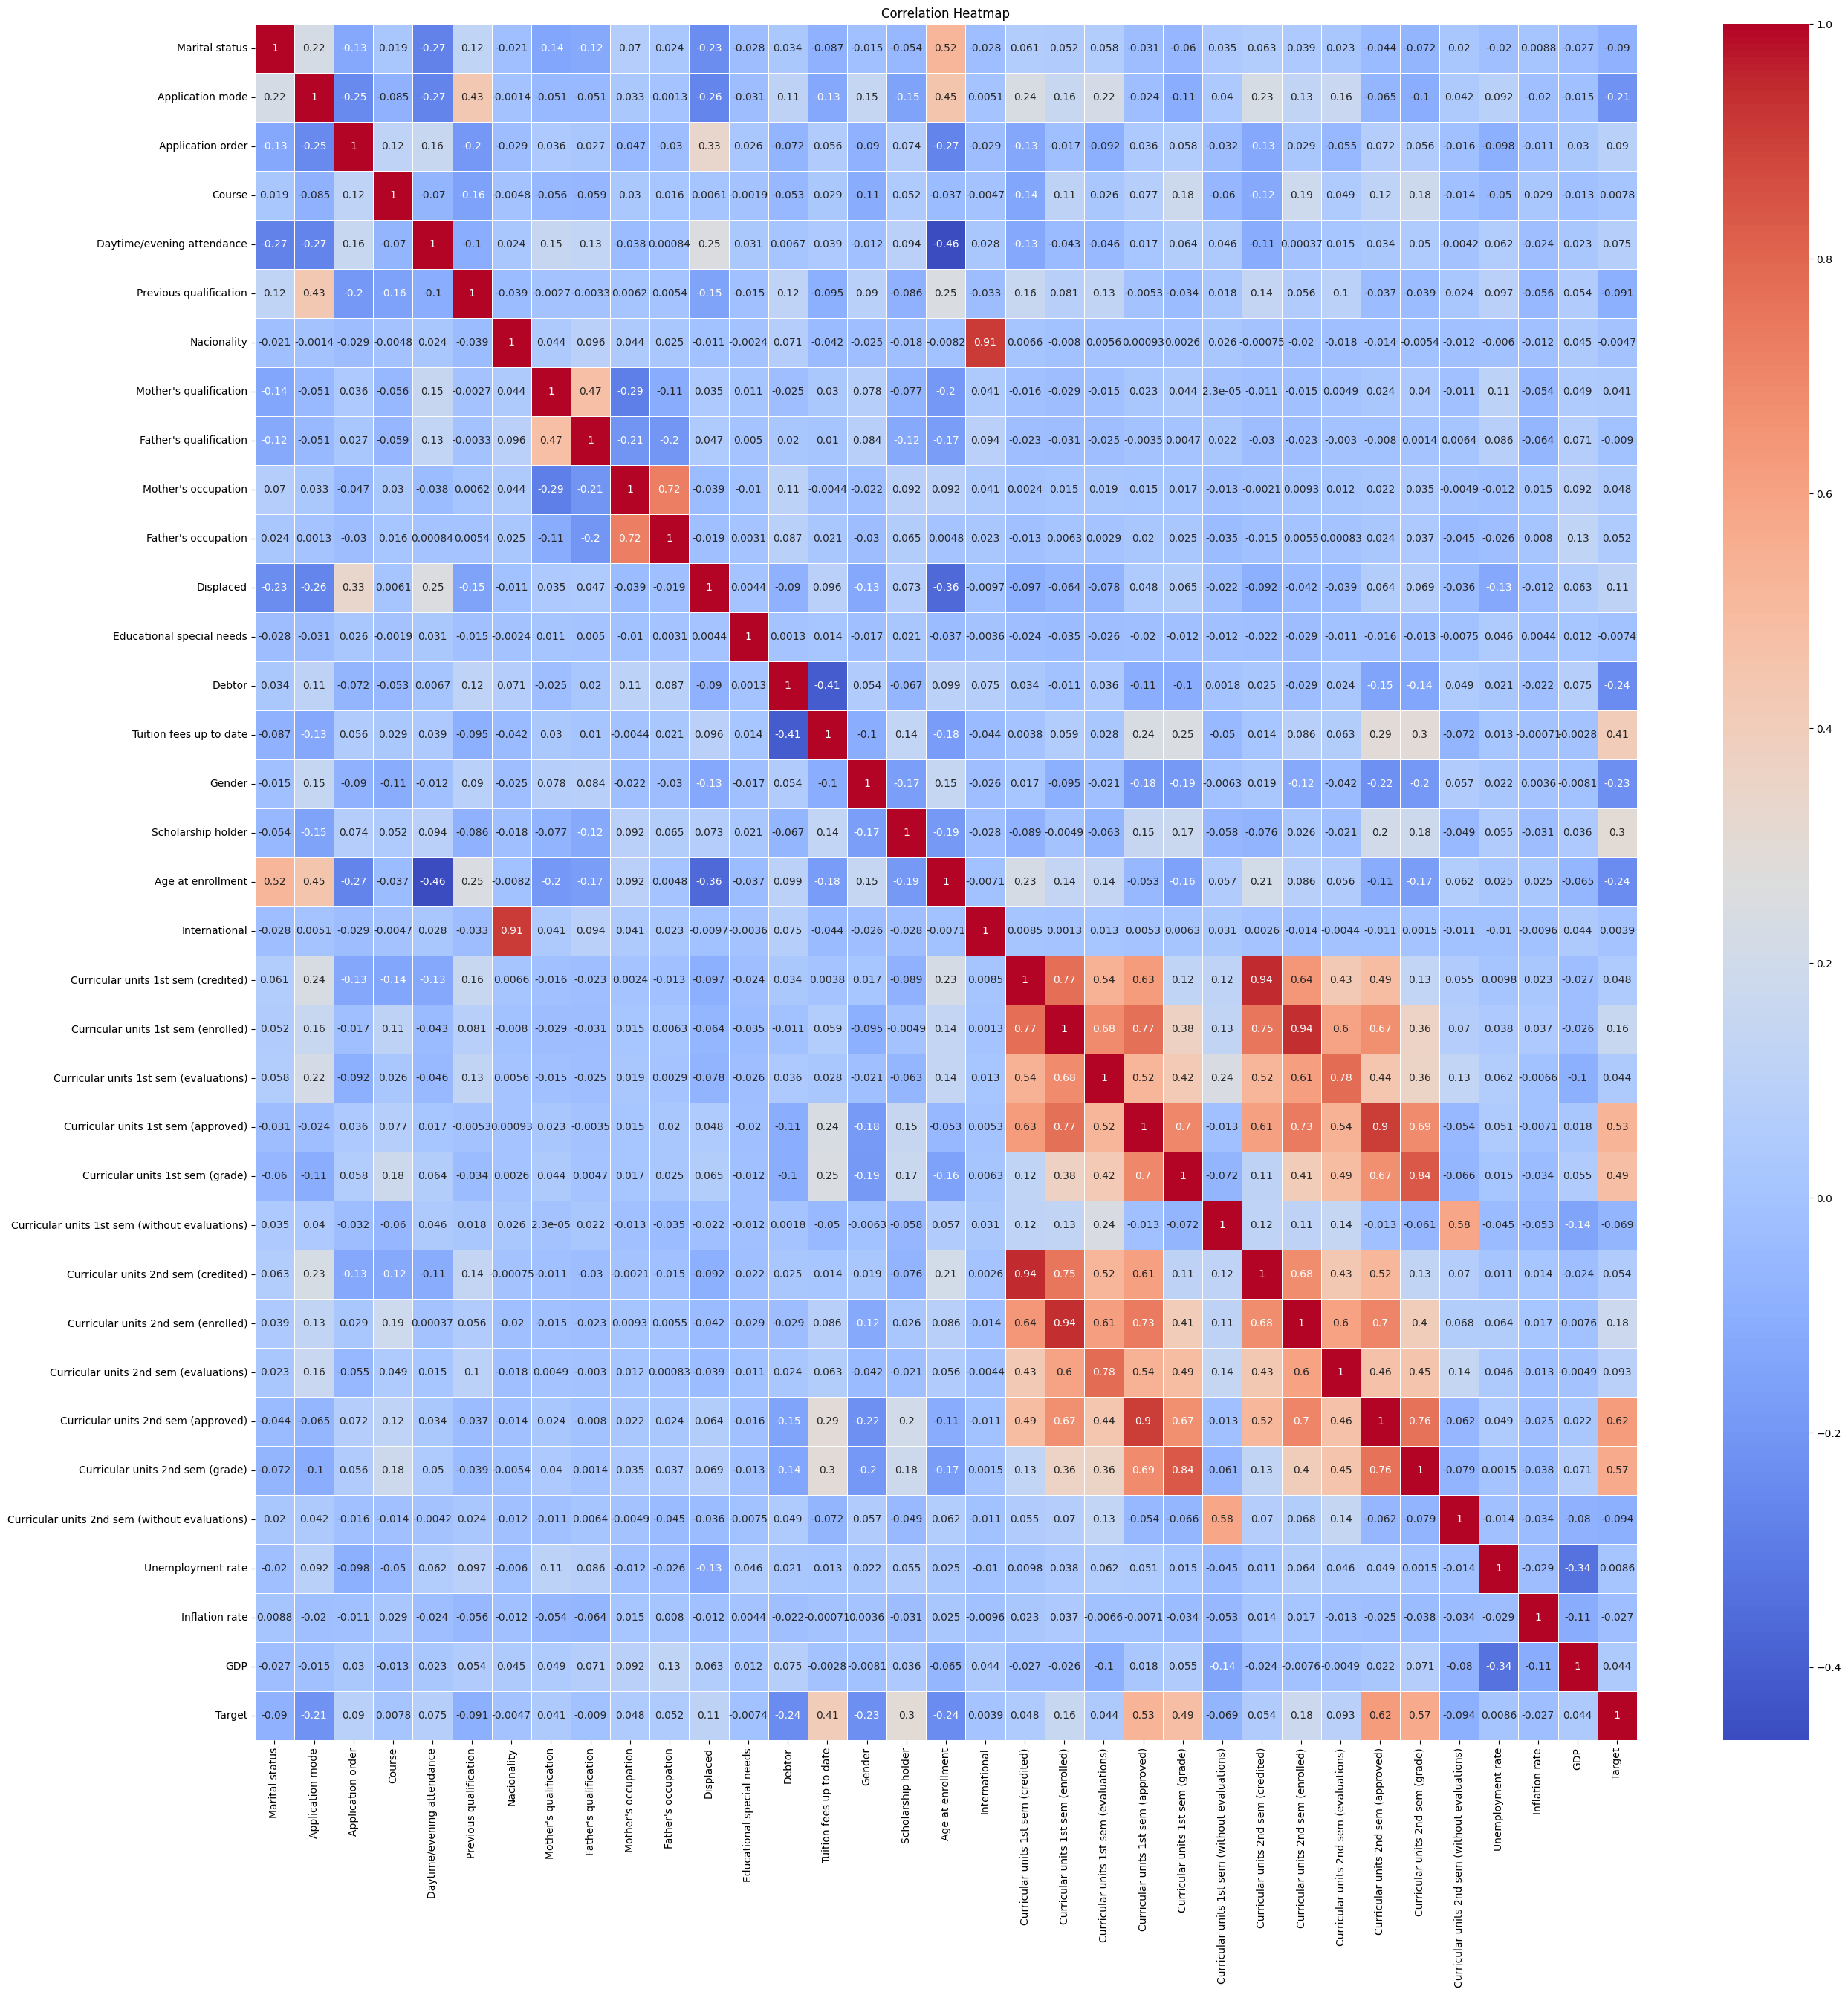

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#exploratory
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,18.818716,11.252486,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.178119
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,5.772979,9.889909,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,-1.000000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,14.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,-1.000000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,16.000000,8.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,0.000000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,25.000000,25.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,33.000000,33.000000,32.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


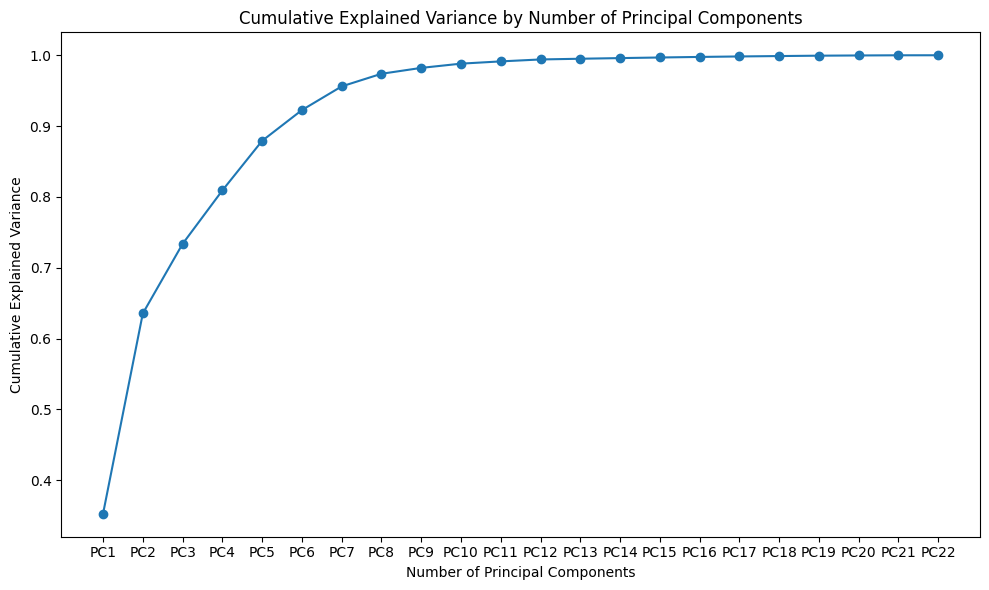

The first 20 principal components explain 99.97 of the variance.
The first 12 principal components explain 99.41% of the variance.


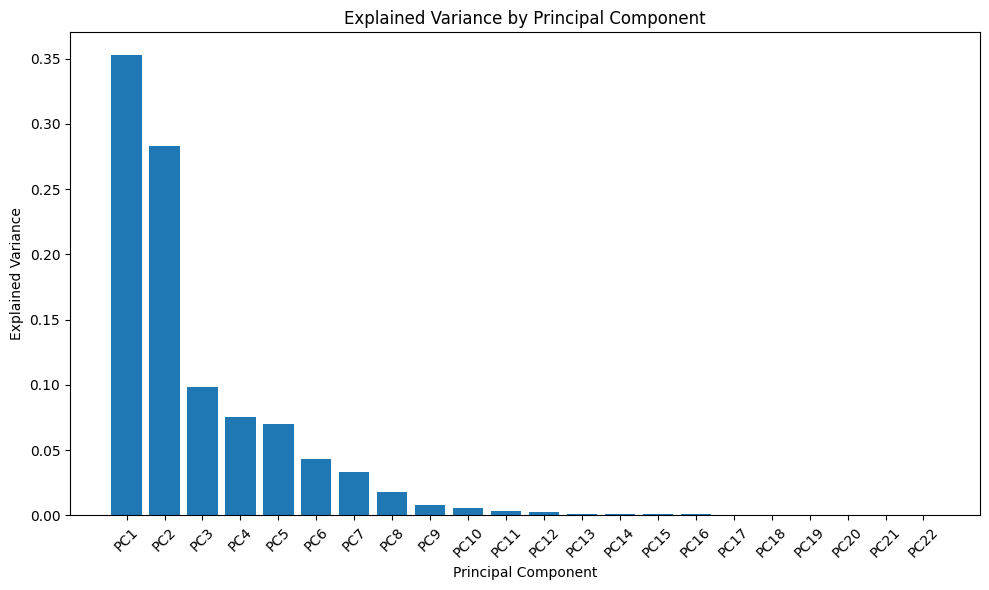

In [ ]:
# Perform feature scaling prior to PCA -- CREDITS TO GREYSON FOR PCA
# mean center the data and divide by the standard deviation
def feature_scale(X):
    # X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    # return X_scaled
    return X

data_scaled = feature_scale(exploration_data.iloc[:, 1:])

# Perform PCA
data_cov = np.cov(data_scaled, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(data_cov)

# Sort the eigenvectors by decreasing eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigvals = eigenvalues[sorted_indices]
sorted_eigvecs = eigenvectors[:, sorted_indices]

# Calculate the explained variance
explained_variance = sorted_eigvals / np.sum(sorted_eigvals)

# Calculate the cumulative explained variance for each number of components
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(exploration_data.columns), 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(exploration_data.columns))
           , ['PC{}'.format(i) for i in range(1, len(exploration_data.columns))])
plt.tight_layout()
plt.show()

first_20_explained_variance = cumulative_explained_variance[19]
first_12_explained_variance = cumulative_explained_variance[11]
print(f'The first 20 principal components explain {first_20_explained_variance * 100:.2f} of the variance.')
print(f'The first 12 principal components explain {first_12_explained_variance * 100:.2f}% of the variance.')

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(exploration_data.columns)), explained_variance)
plt.title('Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xticks(range(1, len(exploration_data.columns))
           , ['PC{}'.format(i) for i in range(1, len(exploration_data.columns))]
           , rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
# top_20_eigvecs = sorted_eigvecs[:, :10]
top_eigvecs = sorted_eigvecs[:, :12]

# Project the data onto the top 20 eigenvectors
# data_proj = np.dot(data_scaled, top_20_eigvecs)
data_proj = np.dot(data_scaled, top_eigvecs)

# Reconstruct the data using the top 20 eigenvectors
# data_reconstructed = np.dot(data_proj, top_20_eigvecs.T)

data_reconstructed = np.dot(data_proj, top_eigvecs.T)


In [ ]:
reconstructed_df = pd.DataFrame(data_reconstructed)

In [ ]:
reconstructed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,7.982016,1.985039,-0.403495,0.996647,-0.450566,-0.009703,0.021573,-0.067897,0.128222,-0.105533,...,0.016674,0.016800,-0.005326,-0.026371,-0.041476,-0.059381,0.014543,0.062521,-0.018854,0.020176
1,5.985010,10.986220,-0.340499,0.999117,-0.479511,-0.022704,-0.052059,0.090986,-0.236328,0.038669,...,5.954697,6.007369,13.993269,-0.012650,-0.040937,6.021401,6.022307,5.973009,13.654099,0.032892
2,0.983980,4.988041,-0.225969,0.997922,-0.496302,-0.020194,0.051164,-0.202341,-0.052064,-0.258707,...,5.969838,0.022631,-0.006914,0.071634,-0.042905,5.989724,0.018754,0.013274,-0.017307,-0.048775
3,7.978055,14.986426,-0.376108,0.994178,-0.497771,-0.023195,-0.008802,0.023145,-0.178514,0.001578,...,6.022685,5.983669,13.429433,-0.058933,-0.174519,5.954252,10.012436,5.117285,12.371734,0.050598
4,11.985385,2.990028,-0.759666,0.996479,-1.024373,-0.033368,-0.030991,0.009678,-0.059678,-0.123701,...,5.897646,5.124481,12.314606,0.014679,0.047431,6.070561,5.997579,5.979554,13.002206,-0.005944


In [ ]:
from sklearn.linear_model import LogisticRegression

In [124]:
# load data
data_1 = pd.read_csv("dropout_data.csv")
data_1.drop(data_1[data_1['Target'] == 'Enrolled'].index, inplace=True)
# data['Target'] = data['Target'].replace(['Dropout', 'Graduate', 'Enrolled'], [-1, 1, 0])

In [ ]:
x = df.iloc[:, :34].values
x = StandardScaler().fit_transform(x)
y = df['Dropout'].values

In [118]:
reconstructed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,7.982016,1.985039,-0.403495,0.996647,-0.450566,-0.009703,0.021573,-0.067897,0.128222,-0.105533,...,0.016674,0.016800,-0.005326,-0.026371,-0.041476,-0.059381,0.014543,0.062521,-0.018854,0.020176
1,5.985010,10.986220,-0.340499,0.999117,-0.479511,-0.022704,-0.052059,0.090986,-0.236328,0.038669,...,5.954697,6.007369,13.993269,-0.012650,-0.040937,6.021401,6.022307,5.973009,13.654099,0.032892
2,0.983980,4.988041,-0.225969,0.997922,-0.496302,-0.020194,0.051164,-0.202341,-0.052064,-0.258707,...,5.969838,0.022631,-0.006914,0.071634,-0.042905,5.989724,0.018754,0.013274,-0.017307,-0.048775
3,7.978055,14.986426,-0.376108,0.994178,-0.497771,-0.023195,-0.008802,0.023145,-0.178514,0.001578,...,6.022685,5.983669,13.429433,-0.058933,-0.174519,5.954252,10.012436,5.117285,12.371734,0.050598
4,11.985385,2.990028,-0.759666,0.996479,-1.024373,-0.033368,-0.030991,0.009678,-0.059678,-0.123701,...,5.897646,5.124481,12.314606,0.014679,0.047431,6.070561,5.997579,5.979554,13.002206,-0.005944


In [ ]:
data_1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
reconstructed_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,6.793238,9.922562,-0.390493,2.550807,-0.587976,-0.023649,0.013691,-0.030086,-0.116427,-0.090901,...,6.321087,4.835883,10.527768,0.110581,0.542651,6.279473,7.772271,4.571163,10.019451,0.160445
std,5.253615,4.340712,0.153143,3.952438,0.199039,0.005723,0.077913,0.141021,0.158054,0.162338,...,2.557337,3.232244,5.057607,0.588748,2.001285,2.248080,3.964138,3.156921,5.481634,0.689831
min,0.969260,0.975684,-1.150385,0.965143,-1.543319,-0.062144,-0.144899,-0.544660,-0.610437,-0.843839,...,-0.022375,-0.826911,-0.094643,-0.182446,-1.048704,-0.104177,-0.010717,-0.606392,-0.174500,-0.206378
25%,0.985285,5.986931,-0.437037,0.996037,-0.704067,-0.025765,-0.051141,-0.137521,-0.247550,-0.236318,...,5.226869,2.969496,10.994801,-0.035848,-0.090156,5.228195,6.006657,1.966432,10.553916,-0.000255
50%,7.977988,10.978661,-0.337784,0.998878,-0.508819,-0.022949,-0.002450,0.016312,-0.135095,-0.055981,...,5.952639,5.227991,12.365287,-0.013099,-0.041332,6.027110,8.003396,5.100498,12.312419,0.018980
75%,11.983638,12.987755,-0.292138,1.003327,-0.438617,-0.021025,0.069291,0.085249,0.017020,0.043192,...,7.038958,6.100159,13.484564,0.013975,0.118745,7.087400,9.990351,6.085010,13.475859,0.045694
max,17.984594,17.026882,-0.021526,17.000703,-0.338779,-0.007281,0.319105,0.219055,0.339284,0.273873,...,24.835004,26.484565,19.042212,11.013779,18.063087,22.250188,33.032585,20.763702,18.546194,12.755689


In [ ]:
data_1.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [125]:
x = reconstructed_df.iloc[:, :].values
x = StandardScaler().fit_transform(x)
y = data_1['Target'].values[:3630]
print(y)

['Dropout' 'Graduate' 'Dropout' ... 'Dropout' 'Graduate' 'Graduate']


In [126]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [137]:

lr = LogisticRegression()
lr.fit(x_train, y_train)

lr_yPred = lr.predict(x_test)


In [132]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression



In [141]:
def performLR_printResults(y_true, y_pred):
    # Calculate evaluation metrics
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='micro')
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    # Print evaluation metrics
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1_score))
    print("Accuracy: {:.4f}".format(accuracy))
    print("\nConfusion Matrix:\n", cm)

    # Print classification report
    report = classification_report(y_true, y_pred, target_names=['Non-Dropout', 'Dropout'])
    print("\n" +  "\n" + " "  + "Classification Report\n" )
    print(report)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Dropout', 'Dropout'])
    disp.plot()

Precision: 0.9022
Recall: 0.9022
F1 Score: 0.9022
Accuracy: 0.9022

Confusion Matrix:
 [[230  48]
 [ 23 425]]


 Classification Report

              precision    recall  f1-score   support

 Non-Dropout       0.91      0.83      0.87       278
     Dropout       0.90      0.95      0.92       448

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



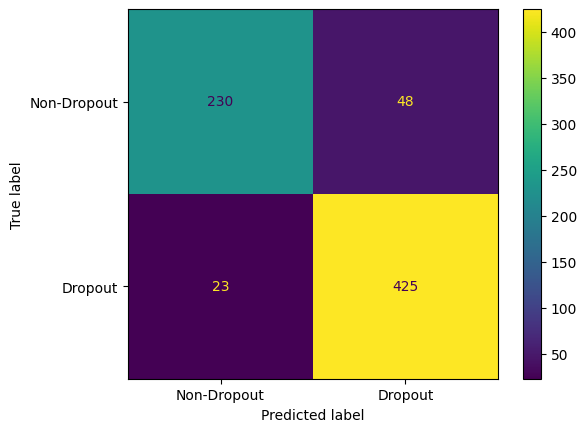

In [142]:
performLR_printResults(y_test, lr_yPred)